In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

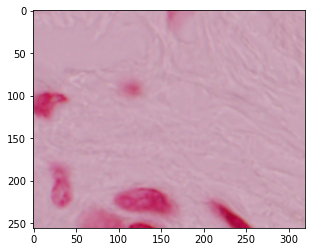

In [4]:
data_dir = './data-science-bowl-2018/stage1_train'
files = []
for each in os.listdir(data_dir)[:5]:
    img_path = f"{data_dir}/{each}/images/{each}.png"
    mask_path = f"{data_dir}/{each}/masks/"
    masks_path = [mask_path+e for e in os.listdir(mask_path)]
    if os.path.isfile(img_path):
        img_ = cv2.imread(img_path, flags=cv2.IMREAD_COLOR)
        plt.imshow(img_)
plt.show()

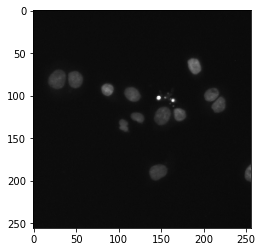

In [10]:
ele = os.listdir(data_dir)[5]
img_path = f"{data_dir}/{ele}/images/{ele}.png"
img_ = cv2.imread(img_path, flags=cv2.IMREAD_COLOR)
plt.imshow(img_)

In [13]:
mask_path = f"{data_dir}/{ele}/masks/"
masks_path = [mask_path+e for e in os.listdir(mask_path)]

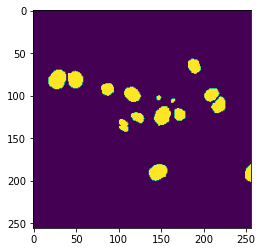

In [40]:

img_masks = np.ones((img_.shape))
for e in masks_path:
    temp = cv2.imread(e, flags=cv2.IMREAD_GRAYSCALE)
    (thresh, temp) = cv2.threshold(temp, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    temp = 1- temp/temp.max()
    img_masks = img_masks * temp
plt.imshow(1 - img_masks)

In [42]:
os.makedirs('./dataset/images')

In [2]:
def masks(mask_path, img_):
    masks_path = [mask_path+e for e in os.listdir(mask_path)]
    img_masks = np.ones((img_.shape[0],img_.shape[1]))
    for e in masks_path:
        temp = cv2.imread(e, flags=cv2.IMREAD_GRAYSCALE)
        (thresh, temp) = cv2.threshold(temp, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
        temp = 1- temp/temp.max()
        img_masks = img_masks * temp
    img_masks = 1 - img_masks
    return img_masks*255


def create_dataset(data_dir = './data-science-bowl-2018/stage1_train', output_path = './dataset'):
    if not os.path.exists(output_path+'/images'):
        os.makedirs(output_path+'/images')
    if not os.path.exists(output_path+'/masks'):
        os.makedirs(output_path+'/masks')
    
    dataset = []
    for i,each in enumerate(os.listdir(data_dir)):        
        img_src = f"{data_dir}/{each}/images/{each}.png"
        img_tar = f"{output_path}/images/img_{i}.png"
        msk_tar = f"{output_path}/masks/msk_{i}.png"
        mask_path = f"{data_dir}/{each}/masks/"
        masks_path = [mask_path+e for e in os.listdir(mask_path)]
        if os.path.isfile(img_src):
            img_ = cv2.imread(img_src, flags=cv2.IMREAD_COLOR)
            mask_ = masks(mask_path, img_)
            cv2.imwrite(msk_tar, mask_)
            cv2.imwrite(img_tar, img_)
            dataset.append((i, each, img_.shape[0],img_.shape[1],img_tar, msk_tar))
    return pd.DataFrame(dataset, columns=['index','key','dim1','dim2','img_src','mask_src'])

In [3]:
dataset_csv = create_dataset(data_dir = './data-science-bowl-2018/stage1_train', output_path = '/dataset')

In [4]:
dataset_csv.to_csv('./dataset/dataset_list.csv')

In [57]:
dataset_csv['dim2'].value_counts()

256     334
320     112
696      92
360      91
1024     16
640      13
1272      6
347       5
1388      1
Name: dim2, dtype: int64